In [22]:
from PIL import Image , ImageOps
import numpy as np
import statistics
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



In [2]:
# Load image, ensure not palettised, and make into Numpy array
pim = Image.open('new face1.png').convert('RGB')
im  = np.array(pim)

# Define the blue colour we want to find - PIL uses RGB ordering
blue = [253,250,230]

# Get X and Y coordinates of all blue pixels
Y, X = np.where(np.all(im==blue,axis=2))

print(statistics.mean(X),statistics.mean(Y))

85 202


In [3]:
# Load image, ensure not palettised, and make into Numpy array
pim = Image.open('new face1.png').convert('RGB')
im  = np.array(pim)

# Define the blue colour we want to find - PIL uses RGB ordering
blue = [250,240,230]

# Get X and Y coordinates of all blue pixels
Y, X = np.where(np.all(im==blue,axis=2))

print(statistics.mean(X),statistics.mean(Y))

111 322


In [4]:
# Load image, ensure not palettised, and make into Numpy array
pim = Image.open('a.png').convert('RGB')
im  = np.array(pim)

# Define the blue colour we want to find - PIL uses RGB ordering
blue = [164,64,64]

# Get X and Y coordinates of all blue pixels
Y, X = np.where(np.all(im==blue,axis=2))
X,Y
# print(statistics.mean(X),statistics.mean(Y))

(array([211, 212, 213, 210, 211, 212, 213, 210, 211, 212, 213, 210, 211,
        212, 213], dtype=int64),
 array([ 7,  7,  7,  8,  8,  8,  8,  9,  9,  9,  9, 10, 10, 10, 10],
       dtype=int64))

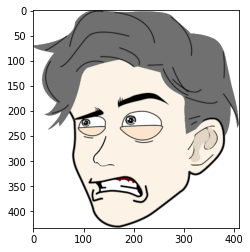

In [142]:
# Opening the primary image (used in background)
face = Image.open(r"new face3.png")
  
# Opening the secondary image (overlay image)
eye = Image.open(r"worried_2_L.png")
eye = eye.resize((191,100))
face.paste(eye, (80,165), mask = eye)
  
# Displaying the image


mouth = Image.open(r"worried_2.png")
im_mirror = ImageOps.mirror(mouth)
# mouth = im_mirror.resize((110,45))
mouth = mouth.resize((120,55))
face.paste(mouth, (110,330), mask = mouth)
# face.show()

# face.save('new_G2.png')
# img = mpimg.imread('your_image.png')
imgplot = plt.imshow(face)
plt.show()

In [6]:
# Opening the primary image (used in background)
body = Image.open(r"a.png")
  
# Opening the secondary image (overlay image)
face = face.resize((322,341))
# Pasting img2 image on top of img1 
# starting at coordinates (0, 0)
body.paste(face, (212, 8), mask = face)
  
# Displaying the image
body.show()
body.save('new_G.png')

In [7]:

# Opening the primary image (used in background)
body = Image.open(r"a.png")
  
# Opening the secondary image (overlay image)
face = face.resize((322,341))
face = face.rotate(5)
# Pasting img2 image on top of img1 
# starting at coordinates (0, 0)
body.paste(face, (212, 8), mask = face)
  
# Displaying the image
body.show()
# body.save('new_G.png')

In [15]:
import cv2
import numpy as np


def image_overlay_second_method(back_img, img2, location, min_thresh=0, is_transparent=False):
    h, w = back_img.shape[:2]
    h1, w1 = img2.shape[:2]
    x, y = location
    roi = back_img[y:y + h1, x:x + w1]

    gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray, min_thresh, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)

    img_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
    img_fg = cv2.bitwise_and(img2, img2, mask=mask)
    dst = cv2.add(img_bg, img_fg)
    if is_transparent:
        dst = cv2.addWeighted(back_img[y:y + h1, x:x + w1], 0.1, dst, 0.9, None)
    back_img[y:y + h1, x:x + w1] = dst
    return back_img



face = cv2.imread('new face1.png', cv2.IMREAD_UNCHANGED)
eyes = cv2.imread("sad.png", cv2.IMREAD_UNCHANGED)
# im  = np.array(face)

scale_percent = 30 # percent of original size
width = int(eyes.shape[1] * scale_percent / 100)
height = int(eyes.shape[0] * scale_percent / 100)
dim = (width, height)
eyes = cv2.resize(eyes, dim, interpolation = cv2.INTER_AREA)

# # Define the blue colour we want to find - PIL uses RGB ordering
# blue = [250,240,230]

# # Get X and Y coordinates of all blue pixels
# Y, X = np.where(np.all(im==blue,axis=2))
img_rgb = image_overlay_second_method(face, eyes, location=(80,202), min_thresh=0, is_transparent=True)
print(statistics.mean(X),statistics.mean(Y))
cv2.imwrite('new_eyes_added.png', img_rgb)


211 8


True

In [40]:
from PIL import Image
import numpy as np
import statistics


def adding_image(img_bg, img_fg, location, size = 30, rotation=0):
    
    """ PIL import image required not openCV """
    width, height = img_fg.size
    scale_percent = size # percent of original size
    width = int(width * scale_percent / 100)
    height = int(height * scale_percent / 100)
    dim = (width, height)
    
    
    if rotation != 0:
        img_fg = img_fg.rotate(rotation)
        
    img_fg = img_fg.resize(dim)
    
    


    img_bg.paste(img_fg, location, mask = img_fg)
    
    return img_bg



face = Image.open(r"new face1.png")

eye = Image.open(r"sad.png")

im  = np.array(face.convert('RGB'))

# Define the blue colour we want to find - PIL uses RGB ordering
blue = [253,250,230]

# Get X and Y coordinates of all blue pixels
Y, X = np.where(np.all(im==blue,axis=2))
x, y=statistics.mean(X),statistics.mean(Y)

new_image = adding_image(face, eye, location=(x,y), rotation=3)
new_image.show()
new_image.save('new_G.png')